In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


# 배추 데이터 가져오기
raw_cabbage = pd.read_csv('C:/sa/cabbage.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_cabbage[col] = raw_cabbage[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_cabbage[columns_to_convert] = raw_cabbage[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df = raw_cabbage[['month', 'retailPrice']]
print(df.head())

    month  retailPrice
0  14-Jan          943
1  14-Feb          892
2  14-Mar          786
3  14-Apr          796
4  14-May          736


In [28]:
df.describe()

,retailPrice
count,123.000000
mean,1553.642276
std,612.013890
min,731.000000
25%,1121.500000
50%,1473.000000
75%,1788.500000
max,4296.000000


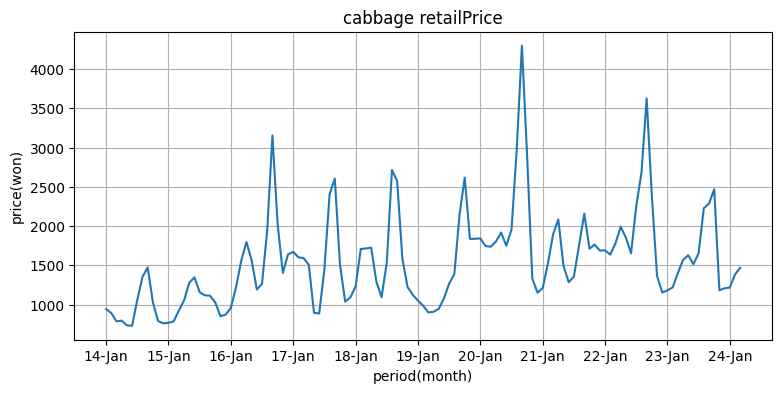

In [29]:
plt.figure(figsize = (9, 4))
plt.title('cabbage retailPrice')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
plt.xticks(range(0, 121, 12))
plt.plot(df['month'], df['retailPrice'])

plt.show()

In [30]:
split = int(len(df)*0.8)
train = df[0:split]
test = df[split:]

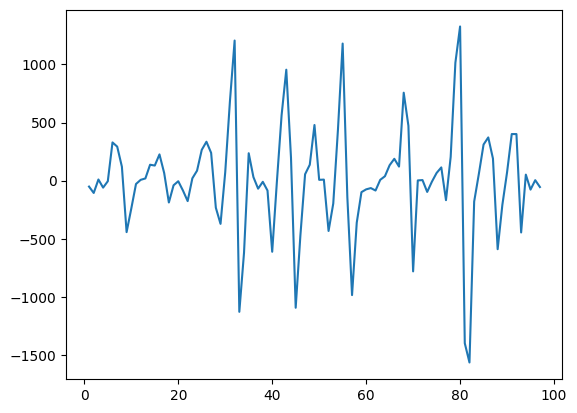

In [31]:
# 1차 차분
diff_1 = train['retailPrice'].diff().dropna()
plt.plot(diff_1)
plt.show()

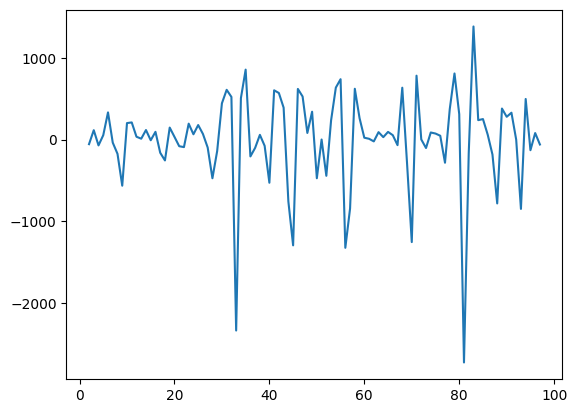

In [32]:
# 2차 차분
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)
plt.show()

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# ARIMA 모델 설정 및 훈련
model = ARIMA(train['retailPrice'], order=(1, 2, 0))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())   # p-value값이 유의미한 결과가 안나오네 

                               SARIMAX Results                                
Dep. Variable:            retailPrice   No. Observations:                   98
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -746.568
Date:                Wed, 29 May 2024   AIC                           1497.136
Time:                        11:11:25   BIC                           1502.264
Sample:                             0   HQIC                          1499.209
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0569      0.109     -0.520      0.603      -0.271       0.157
sigma2      3.363e+05   2.56e+04     13.132      0.000    2.86e+05    3.87e+05
Ljung-Box (L1) (Q):                   0.08   Jarque-

In [37]:
# 테스트 데이터 예측
forecast = model_fit.forecast(steps=len(test))  # 테스트 데이터의 길이만큼 예측

# 테스트 데이터 가져오기
test_y = test['retailPrice'].values

# RMSE 계산
RMSE = np.sqrt(mean_squared_error(test_y, forecast))
print("RMSE:", RMSE)

RMSE: 995.6417426263052


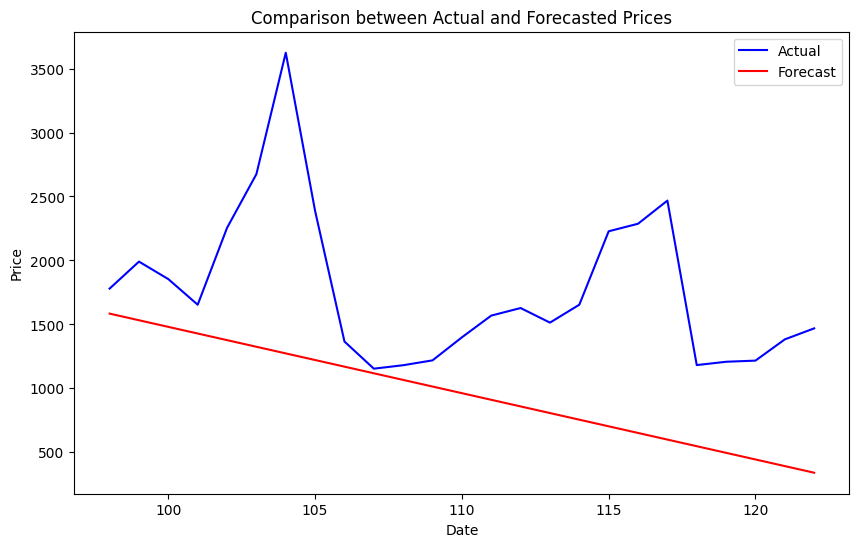

In [39]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['retailPrice'], label='Actual', color='blue')  # 실제 테스트 데이터 그래프
plt.plot(test.index, forecast, label='Forecast', color='red')  # 예측값 그래프
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison between Actual and Forecasted Prices')
plt.legend()
plt.show()